In [4]:
import numpy as np
import tensorflow as tf
from keras.applications.mobilenet_v2 import MobileNetV2

In [5]:
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.applications import imagenet_utils
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam,Adadelta
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from IPython.display import Image
from keras.optimizers import Adam
from keras.initializers import glorot_normal
from keras.callbacks.callbacks import ModelCheckpoint

In [25]:
image_generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1./255)

In [26]:
data_training_dir = r"C:\Users\Tamiros\Documents\Work\car damage detection\data1a\training"
data_validation_dir = r"C:\Users\Tamiros\Documents\Work\car damage detection\data1a\validation"
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
CLASS_NAMES = ['okay','damaged']
SEED = 2

In [27]:
train_data_gen = image_generator.flow_from_directory(directory=data_training_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = CLASS_NAMES,
                                                     class_mode='categorical')

validation_data_gen = test_generator.flow_from_directory(directory=data_validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = CLASS_NAMES,
                                                     batch_size = 460,
                                                     class_mode='categorical',
                                                     shuffle=False)

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [36]:
base_model = MobileNetV2(input_shape=(224,224,3), alpha=1.0, include_top=False, weights='imagenet')
# base_model.trainable = False

In [48]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.1)(x)
x=Dense(512,activation='relu')(x)
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [49]:
model=Model(inputs=base_model.input,outputs=preds)

In [50]:
for layer in model.layers:
    layer.trainable=False

for layer in model.layers[-5:]:
  layer.trainable = True

In [51]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [52]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical_crossentropy

In [53]:
# model.load_weights(r'sigmoid-all-data-aug-weights-improvement-19-0.90.hdf5')

In [ ]:
step_size_train=train_data_gen.n//train_data_gen.batch_size
step_size_validation = validation_data_gen.n//validation_data_gen.batch_size
history = model.fit_generator(generator=train_data_gen,
                   steps_per_epoch=step_size_train,
                  validation_data=validation_data_gen,
                   epochs=20,
                   class_weight={0:1,1:3})


Epoch 1/20
28/28 [==============================] - 260s 9s/step - loss: 0.9314 - accuracy: 0.7646 - val_loss: 0.4147 - val_accuracy: 0.7891
Epoch 2/20
28/28 [==============================] - 287s 10s/step - loss: 0.4154 - accuracy: 0.8722 - val_loss: 0.5480 - val_accuracy: 0.7457
Epoch 3/20
28/28 [==============================] - 259s 9s/step - loss: 0.4611 - accuracy: 0.8671 - val_loss: 0.3823 - val_accuracy: 0.8109
Epoch 4/20
28/28 [==============================] - 264s 9s/step - loss: 0.4149 - accuracy: 0.8773 - val_loss: 0.6106 - val_accuracy: 0.7043
Epoch 5/20
15/28 [===============>..............] - ETA: 1:35 - loss: 0.4204 - accuracy: 0.8898

In [ ]:
preds = model.predict(validation_data_gen)

In [ ]:
val_batch,label_batch = next(validation_data_gen)

In [ ]:
wrongs_indexs = []
estimates = []
for idx,i in enumerate(np.argmax(preds, axis=1)):
  if label_batch[idx][i] != 1:
      wrongs_indexs.append(idx)
      estimates.append(preds[idx])

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[np.argmax(label_batch[n])].title())
      plt.axis('off')

In [ ]:
len(wrongs_indexs)

48

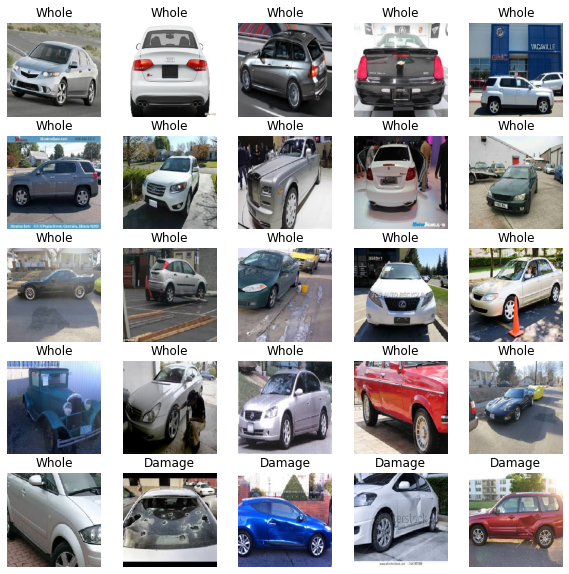

In [ ]:
show_batch(val_batch[wrongs_indexs],label_batch[wrongs_indexs])